# <div style="padding: 50px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-position: 50% 50%;background-size: 200% 200%"><b><span style='background-color:rgba(0,0,0,0.7);color:white;border-radius:5px;padding: 0px 15px'>Introduction</span></b> </div>

In this project, we will discuss churn, a term used in the business world to refer to the rate of customer loss. Churn is an important indicator for any business, as it can significantly affect its profitability and growth. Therefore, it is essential to understand the causes of churn and how to prevent it in order to maintain a solid base of loyal and satisfied customers.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv('Churn_Modelling.csv')

In [82]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [83]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [84]:
data.shape

(10000, 14)

<div style="padding: 50px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-position: 100% 50%;background-size: 150% 200%"><b><span style='background-color:rgba(0,0,0,0.7);color:white;border-radius:5px;padding: 0px 15px'>Data Preprocessing</span></b> </div>

In [85]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [87]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

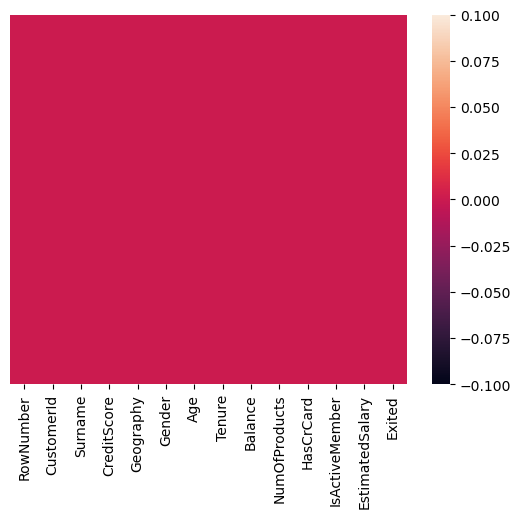

In [88]:
sns.heatmap(data.isnull(), yticklabels=False)

In [89]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [90]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [91]:
data.shape

(10000, 14)

In [92]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [93]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<li> The Data is ready for analysis
</div>

# <div style="padding: 50px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-position: 100% 50%;background-size: 150% 200%"><b><span style='background-color:rgba(0,0,0,0.7);color:white;border-radius:5px;padding: 0px 15px'>Churn Analysis</span></b> </div>

In [94]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

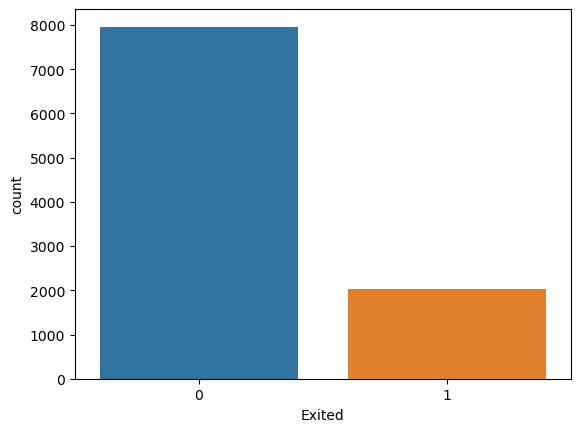

In [95]:
# plot churned
sns.countplot(data['Exited'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

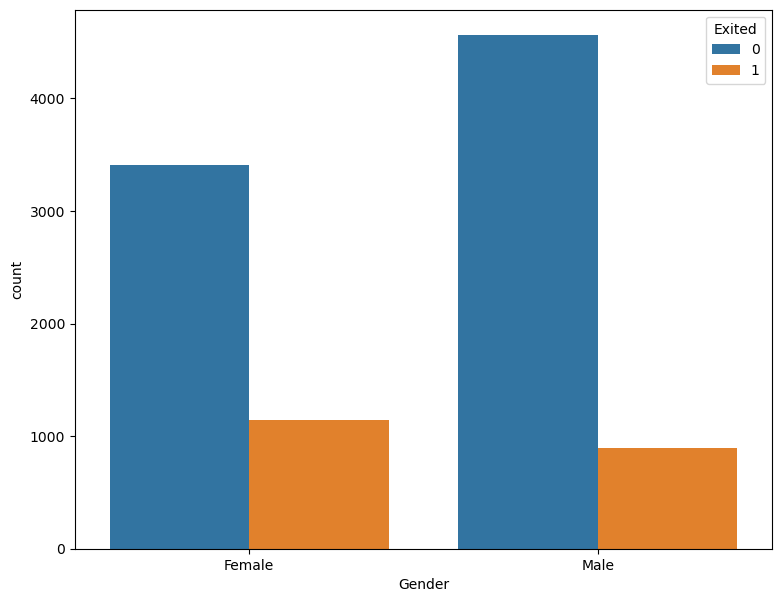

In [96]:
# plot churned clients by gender
fig = plt.figure(figsize=(9, 7))
sns.countplot(x='Gender', hue='Exited', data=data)

In [97]:
dfgenderFNoChurn=data.loc[(data["Gender"]=='Female') & (data['Exited']==0)]

In [98]:
genderFNoChurn=dfgenderFNoChurn.shape[0]

In [99]:
genderFNoChurn

3404

In [100]:
dfgenderFChurn=data.loc[(data["Gender"]=='Female') & (data['Exited']==1)]

In [101]:
genderFChurn=dfgenderFChurn.shape[0]

In [102]:
genderFChurn

1139

In [103]:
sumgenderF = genderFNoChurn+genderFChurn

In [104]:
sumgenderF

4543

In [105]:
genderFMean = genderFNoChurn/ (sumgenderF)*100

In [106]:
genderFMean

74.92846136913933

In [107]:
dfgenderMaleNoChurn=data.loc[(data["Gender"]=='Male') & (data['Exited']==0)]

In [108]:
genderMaleNoChurn=dfgenderMaleNoChurn.shape[0]

In [109]:
genderMaleNoChurn

4559

In [110]:
dfgenderMChurn=data.loc[(data["Gender"]=='Male') & (data['Exited']==1)]

In [111]:
genderMChurn=dfgenderMChurn.shape[0]

In [112]:
genderMChurn

898

In [113]:
sumgenderMale = genderMaleNoChurn+genderMChurn

In [114]:
sumgenderMale

5457

In [115]:
genderMaleMean = genderMaleNoChurn/ (sumgenderMale)*100

In [116]:
genderMaleMean 

83.54407183434121

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<h3 align="left"><font color=rgb(255,255,255)>Gender Analysis </font></h3>
<li>There are 4543 women in the sample, of which 3404 do not churn and 1139 do. 
<li>The average number of women who do not churn is 74.92%.
<li>There are 5457 men in the sample, of which 4559 do not churn and 898 do. 
<li>The average male churn rate is 83.54%.
</div>

<AxesSubplot:xlabel='Geography', ylabel='count'>

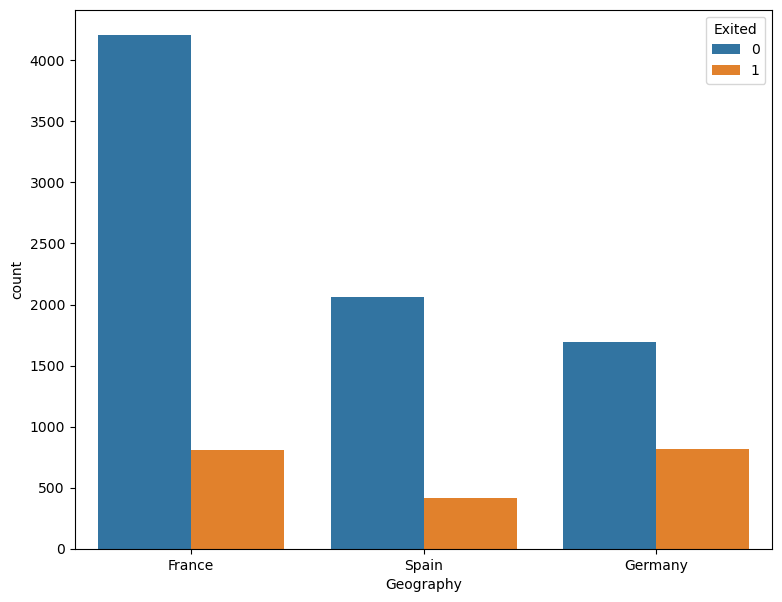

In [117]:
# plot churned clients by country
fig = plt.figure(figsize=(9, 7))
sns.countplot(x='Geography', hue='Exited', data=data)

In [118]:
dfCountryFranceNo=data.loc[(data["Geography"]=="France") & (data['Exited']==0)]

In [119]:
CountryFranceNo=dfCountryFranceNo.shape[0]

In [120]:
CountryFranceNo

4204

In [121]:
dfCountryFranceChurn=data.loc[(data["Geography"]=="France") & (data['Exited']==1)]

In [122]:
CountryFranceChurn=dfCountryFranceChurn.shape[0]

In [123]:
CountryFranceChurn

810

In [124]:
sumCountryFrance = CountryFranceNo + CountryFranceChurn

In [125]:
sumCountryFrance 

5014

In [126]:
CountryFranceMean = CountryFranceNo / (sumCountryFrance )*100

In [127]:
CountryFranceMean

83.84523334662943

In [128]:
dfCountrySpainNo=data.loc[(data["Geography"]=="Spain") & (data['Exited']==0)]

In [129]:
CountrySpainNo=dfCountrySpainNo.shape[0]

In [130]:
CountrySpainNo

2064

In [131]:
dfCountrySpainChurn=data.loc[(data["Geography"]=="Spain") & (data['Exited']==1)]

In [132]:
CountrySpainChurn=dfCountrySpainChurn.shape[0]

In [133]:
CountrySpainChurn

413

In [134]:
sumCountrySpain = CountrySpainNo + CountrySpainChurn

In [135]:
sumCountrySpain

2477

In [136]:
CountrySpainMean = CountrySpainNo / (sumCountrySpain )*100

In [137]:
CountrySpainMean 

83.3266047638272

In [138]:
dfCountryGermanyNoChurn=data.loc[(data["Geography"]=="Germany") & (data['Exited']==0)]

In [139]:
CountryGermanyNoChurn=dfCountryGermanyNoChurn.shape[0]

In [140]:
CountryGermanyNoChurn

1695

In [141]:
dfCountryGermanyChurn=data.loc[(data["Geography"]=="Germany") & (data['Exited']==1)]

In [142]:
CountryGermanyChurn=dfCountryGermanyChurn.shape[0]

In [143]:
CountryGermanyChurn

814

In [144]:
sumCountryGermany =CountryGermanyNoChurn + CountryGermanyChurn

In [145]:
sumCountryGermany

2509

In [146]:
CountryGermanyMean =CountryGermanyNoChurn / (sumCountryGermany )*100

In [147]:
CountryGermanyMean

67.55679553607014

<div style="border-radius:15px; border:#125899 solid; padding: 15px; background-color:rgb(235,235,238); font-size:100%; text-align:left">
<h3 align="left"><font color=rgb(255,255,255)>Geography Analysis </font></h3>
<li> Based on the data provided, there are a total of 10000 customers, of which 5014 are France, 2477 customers are Spain and 2509 are Germany.
<li> Of the customers who are Spain, the average no churn rate is 83.32%, while of those who are France, the average no churn rate is 83.84%. On the other hand, 67.55% of those who are Germany.
<li> Clearly, more attention should be paid to the customer are Germany, as they have a higher average churn rate.
</div>

In [148]:
# plot churned clients by age

<AxesSubplot:xlabel='Age', ylabel='count'>

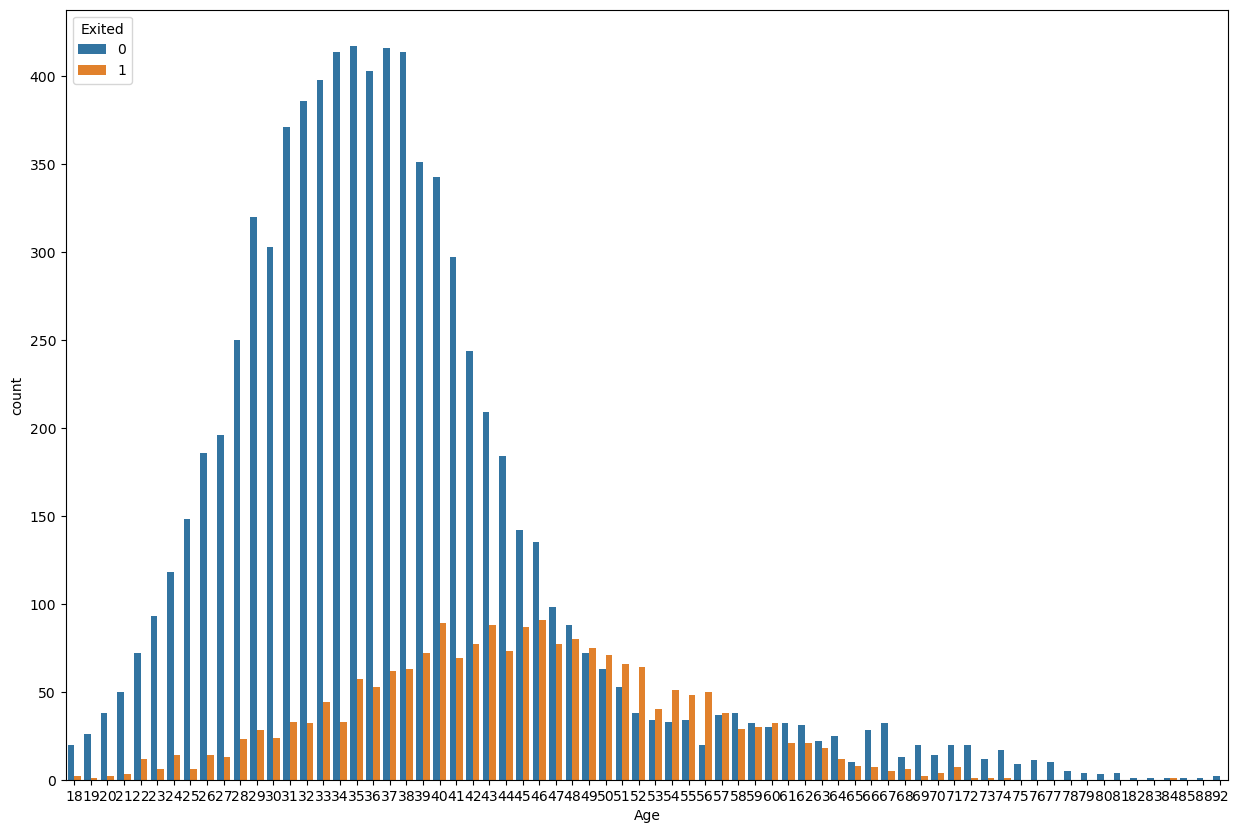

In [149]:
fig = plt.figure(figsize=(15, 10))
sns.countplot(x='Age', hue='Exited', data=data)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

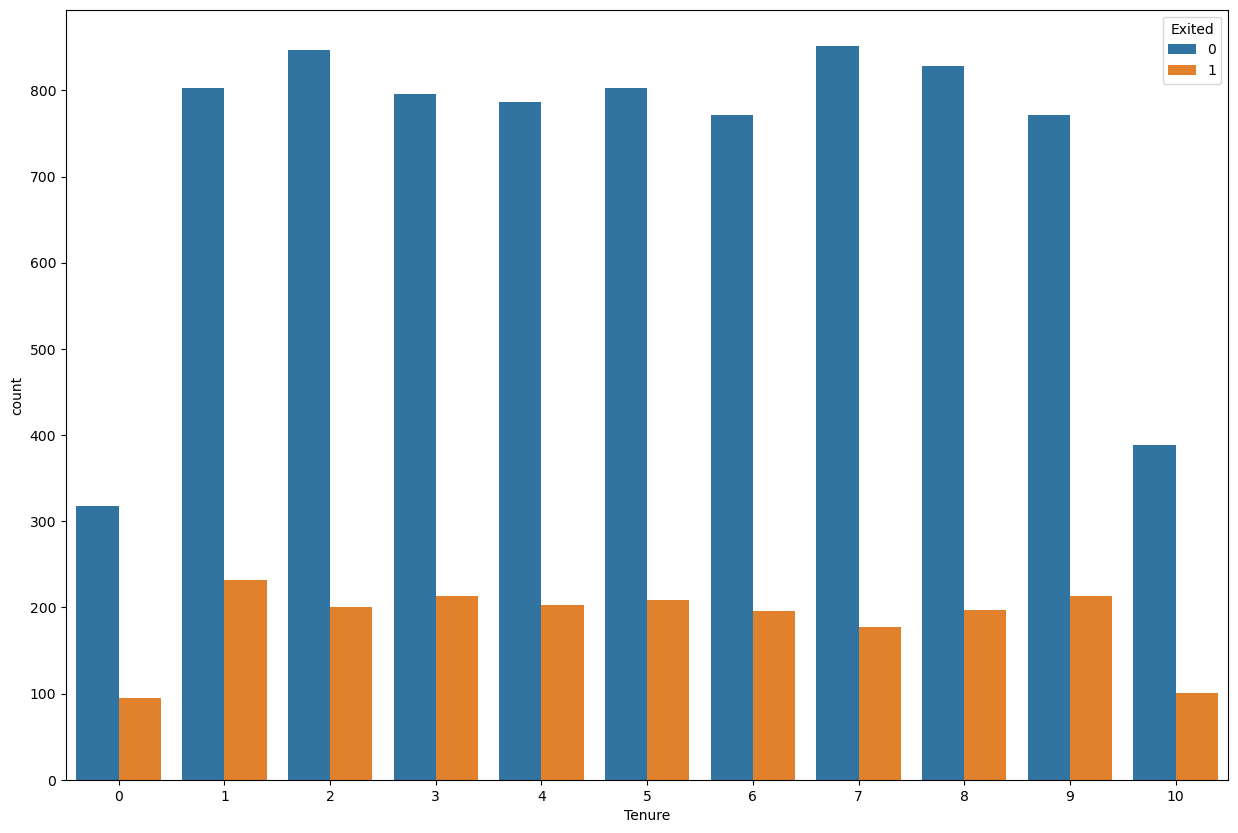

In [150]:
# plot churned clients by tenure
fig = plt.figure(figsize=(15, 10))
sns.countplot(x='Tenure', hue='Exited', data=data)


</div>

# <div style="padding: 50px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-position: 100% 50%;background-size: 150% 200%"><b><span style='background-color:rgba(0,0,0,0.7);color:white;border-radius:5px;padding: 0px 15px'>Model Building</span></b> </div>


In [151]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [152]:
data = pd.get_dummies(data,drop_first=True)

In [153]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [184]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [185]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [186]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [187]:
#Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [188]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [189]:
#StandardScaler
from sklearn.preprocessing import StandardScaler

In [190]:
sc= StandardScaler()

In [191]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [192]:
X_train

array([[ 0.22076154, -0.09732415, -1.39443815, ..., -0.56997825,
        -0.46400535, -0.84102145],
       [ 1.10126778,  0.10389456, -1.39443815, ..., -0.56997825,
        -0.46400535,  1.18903032],
       [ 0.69403364, -0.90219899, -0.29392964, ...,  1.7544529 ,
        -0.46400535,  1.18903032],
       ...,
       [ 0.19874888,  0.20450391,  1.17341504, ..., -0.56997825,
        -0.46400535,  1.18903032],
       [-0.02137768,  0.80816004,  0.4397427 , ..., -0.56997825,
        -0.46400535, -0.84102145],
       [ 0.52893872,  1.00937875, -1.39443815, ...,  1.7544529 ,
        -0.46400535,  1.18903032]])

In [193]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

In [194]:
log = LogisticRegression()

In [195]:
a=log.fit(X_train,y_train)

In [196]:
y_pred1 = log.predict(X_test)

In [390]:
y_pred1

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [391]:
#accuracy_score
from sklearn.metrics import accuracy_score

In [392]:
accuracy_score(y_test,y_pred1)

0.7818581293157565

In [393]:
accuracy_score(y_test,y_pred1)

0.7818581293157565

In [394]:
#Metrics precision_score,recall_score,f1_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [395]:
precision_score(y_test,y_pred1)

0.7718631178707225

In [396]:
recall_score(y_test,y_pred1)

0.7842884739214424

In [397]:
f1_score(y_test,y_pred1)

0.7780261897157459

In [398]:
#svm
from sklearn import svm

In [399]:
svm = svm.SVC()

In [400]:
svm.fit(X_train,y_train)

SVC()

In [401]:
y_pred2 = svm.predict(X_test)

In [402]:
accuracy_score(y_test,y_pred2)

0.8418079096045198

In [403]:
precision_score(y_test,y_pred2)

0.8351437699680511

In [404]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [405]:
knn = KNeighborsClassifier()

In [406]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [407]:
y_pred3 = knn.predict(X_test)

In [408]:
accuracy_score(y_test,y_pred3)

0.8179535467671061

In [409]:
precision_score(y_test,y_pred3)

0.7982832618025751

In [410]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [411]:
dt = DecisionTreeClassifier()

In [412]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [413]:
y_pred4 = dt.predict(X_test)

In [414]:
accuracy_score(y_test,y_pred4)

0.7922159447583177

In [415]:
precision_score(y_test,y_pred4)

0.7724770642201835

In [416]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [417]:
rf = RandomForestClassifier()

In [418]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [419]:
y_pred5 = rf.predict(X_test)

In [420]:
accuracy_score(y_test,y_pred5)

0.8650345260514752

In [421]:
precision_score(y_test,y_pred5)

0.8560558021559924

In [422]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [423]:
gbc = GradientBoostingClassifier()

In [424]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [425]:
y_pred6 = gbc.predict(X_test)

In [426]:
accuracy_score(y_test,y_pred6)

0.8430634023854363

In [427]:
precision_score(y_test,y_pred6)

0.8403361344537815

In [428]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

<AxesSubplot:xlabel='Models', ylabel='ACC'>

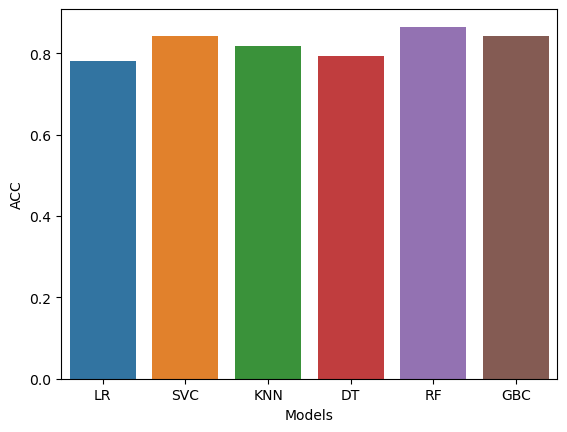

In [429]:
#comparation models
sns.barplot(final_data['Models'],final_data['ACC'])